In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


print("Customer Churn Prediction - Data Exploration")


Customer Churn Prediction - Data Exploration


In [5]:
import zipfile
zip_filename = 'archive (16).zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('.')
    file_list = zip_ref.namelist()
    print(f"Extracted files: {file_list}")
csv_files = [f for f in file_list if f.endswith('.csv')]
csv_file = csv_files[0]
print(f"Loading: {csv_file}")

df = pd.read_csv(csv_file)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

Extracting dataset from archive...
Extracted files: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
Loading: WA_Fn-UseC_-Telco-Customer-Churn.csv
✓ Dataset loaded successfully!
Shape: 7043 rows, 21 columns



In [8]:

print("DATASET OVERVIEW")

print(df.head(10))


print("COLUMN INFORMATION")

print(df.info())

print("STATISTICAL SUMMARY")

print(df.describe())

print("MISSING VALUES")

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

DATASET OVERVIEW
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service       

TARGET VARIABLE: CHURN

Churn Distribution:
No:  5,174 (73.46%)
Yes: 1,869 (26.54%)


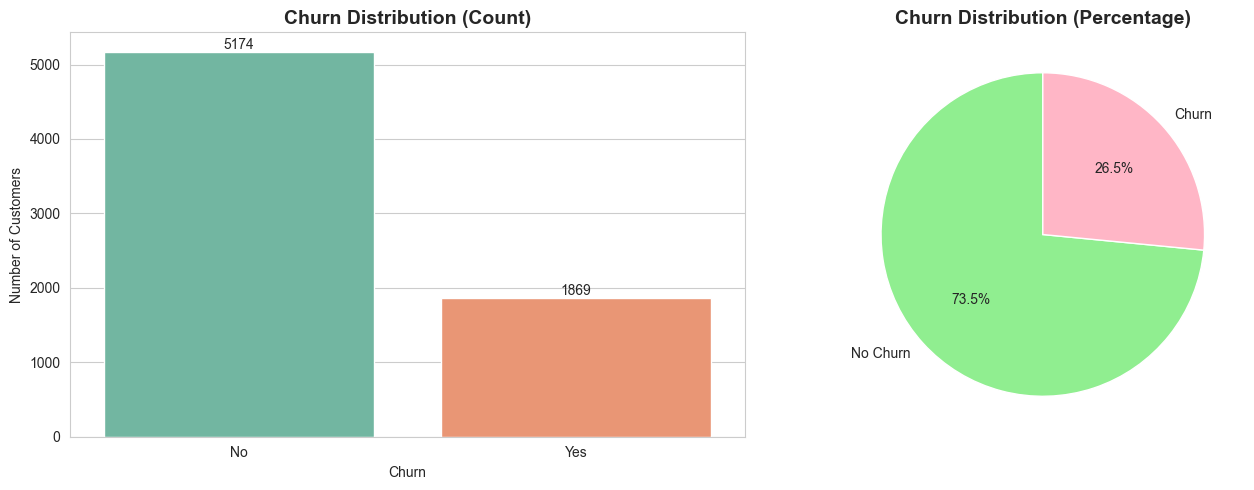

In [9]:

print("TARGET VARIABLE: CHURN")

churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nChurn Distribution:")
print(f"No:  {churn_counts['No']:,} ({churn_pct['No']:.2f}%)")
print(f"Yes: {churn_counts['Yes']:,} ({churn_pct['Yes']:.2f}%)")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x='Churn', palette='Set2', ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Customers')
for container in axes[0].containers:
    axes[0].bar_label(container)
colors = ['#90EE90', '#FFB6C6']
axes[1].pie(churn_pct, labels=['No Churn', 'Churn'], autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
print("\n" + "="*80)
print("DATA CLEANING")
print("="*80)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_total_charges = df['TotalCharges'].isnull().sum()
if missing_total_charges > 0:
    print(f"\n✓ Found {missing_total_charges} missing values in TotalCharges")
    print("  Filling with 0 (likely new customers)")
    df['TotalCharges'].fillna(0, inplace=True)

if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("✓ Dropped customerID column")

print(df.shape)


DATA CLEANING
(7043, 20)


In [12]:
print("FEATURE TYPES")


numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

if 'Churn' in numerical_features:
    numerical_features.remove('Churn')
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

print(f"\nNumerical Features ({len(numerical_features)}):")
print(numerical_features)
print(f"\nCategorical Features ({len(categorical_features)}):")
print(categorical_features)

FEATURE TYPES

Numerical Features (4):
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Features (15):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


NUMERICAL FEATURES ANALYSIS


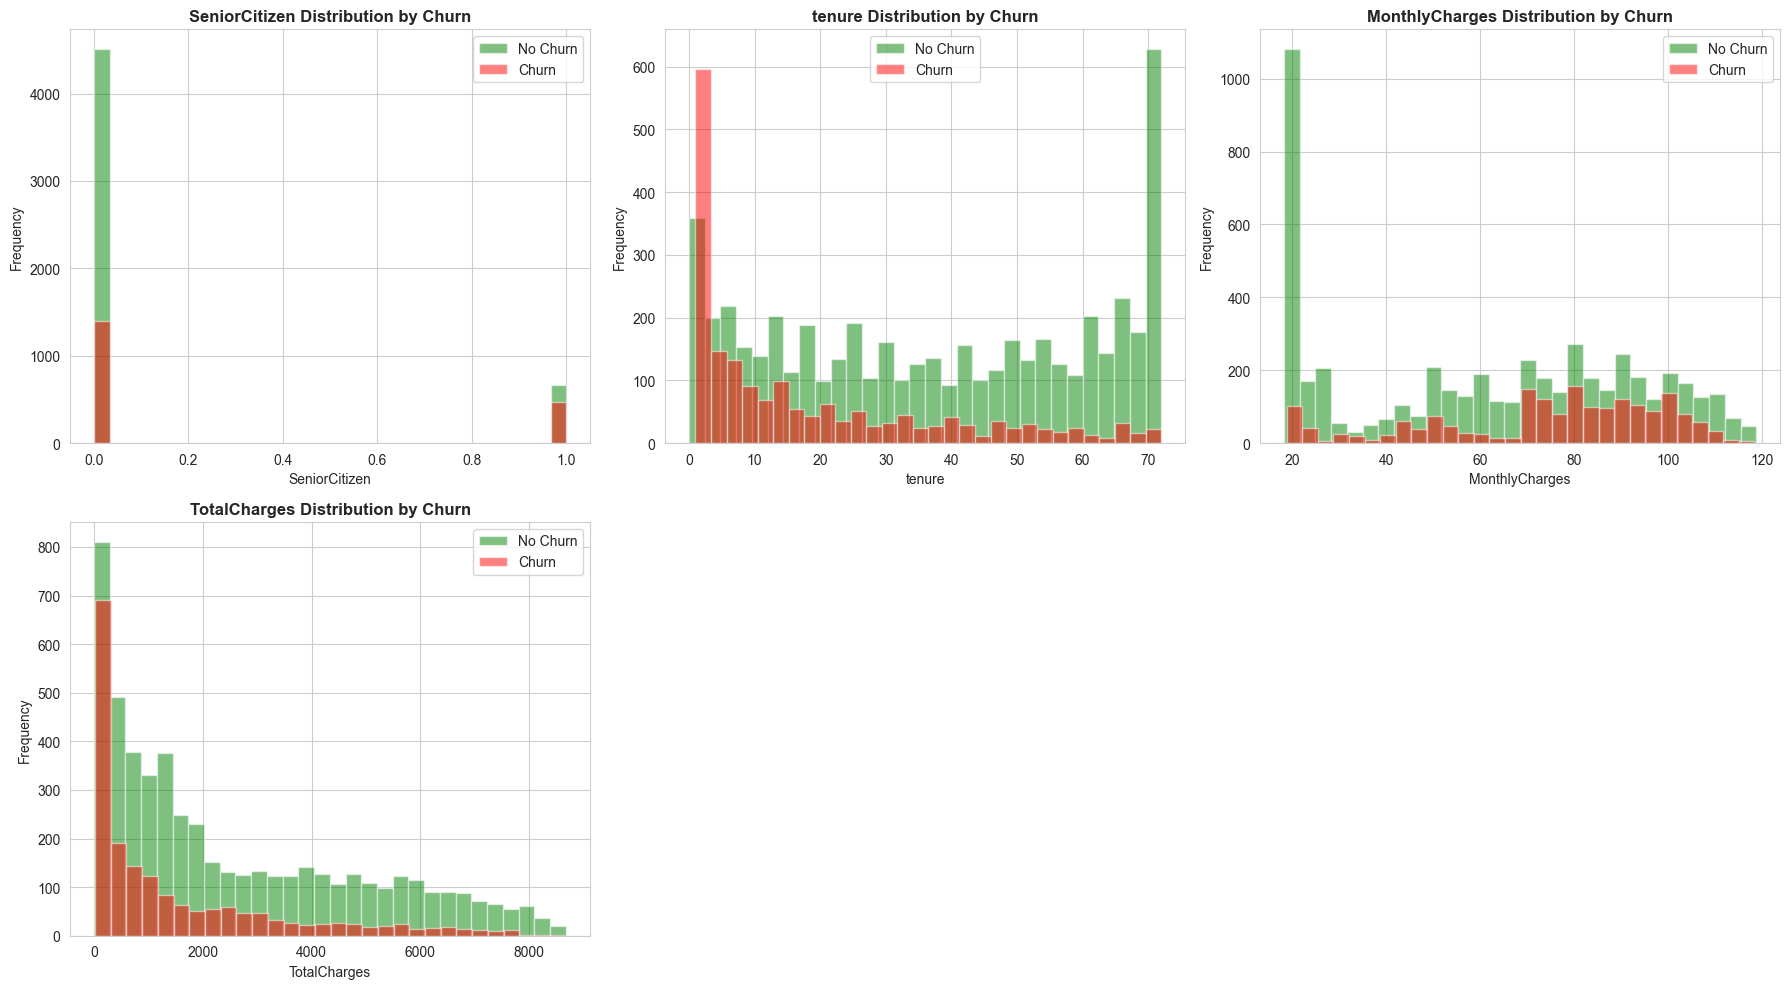


Correlation with Churn:
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn_Binary, dtype: float64


In [15]:

print("NUMERICAL FEATURES ANALYSIS")

num_features = len(numerical_features)
if num_features > 0:
    cols = min(num_features, 3)
    rows = (num_features + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    if num_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_features):
        df[df['Churn'] == 'No'][col].hist(alpha=0.5, bins=30, label='No Churn', 
                                           ax=axes[idx], color='green')
        df[df['Churn'] == 'Yes'][col].hist(alpha=0.5, bins=30, label='Churn', 
                                            ax=axes[idx], color='red')
        axes[idx].set_title(f'{col} Distribution by Churn', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
    
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found.")

# Correlation with churn
df_temp = df.copy()
df_temp['Churn_Binary'] = (df_temp['Churn'] == 'Yes').astype(int)

correlations = df_temp[numerical_features + ['Churn_Binary']].corr()['Churn_Binary'].drop('Churn_Binary').sort_values(ascending=False)

print("\nCorrelation with Churn:")
print(correlations)


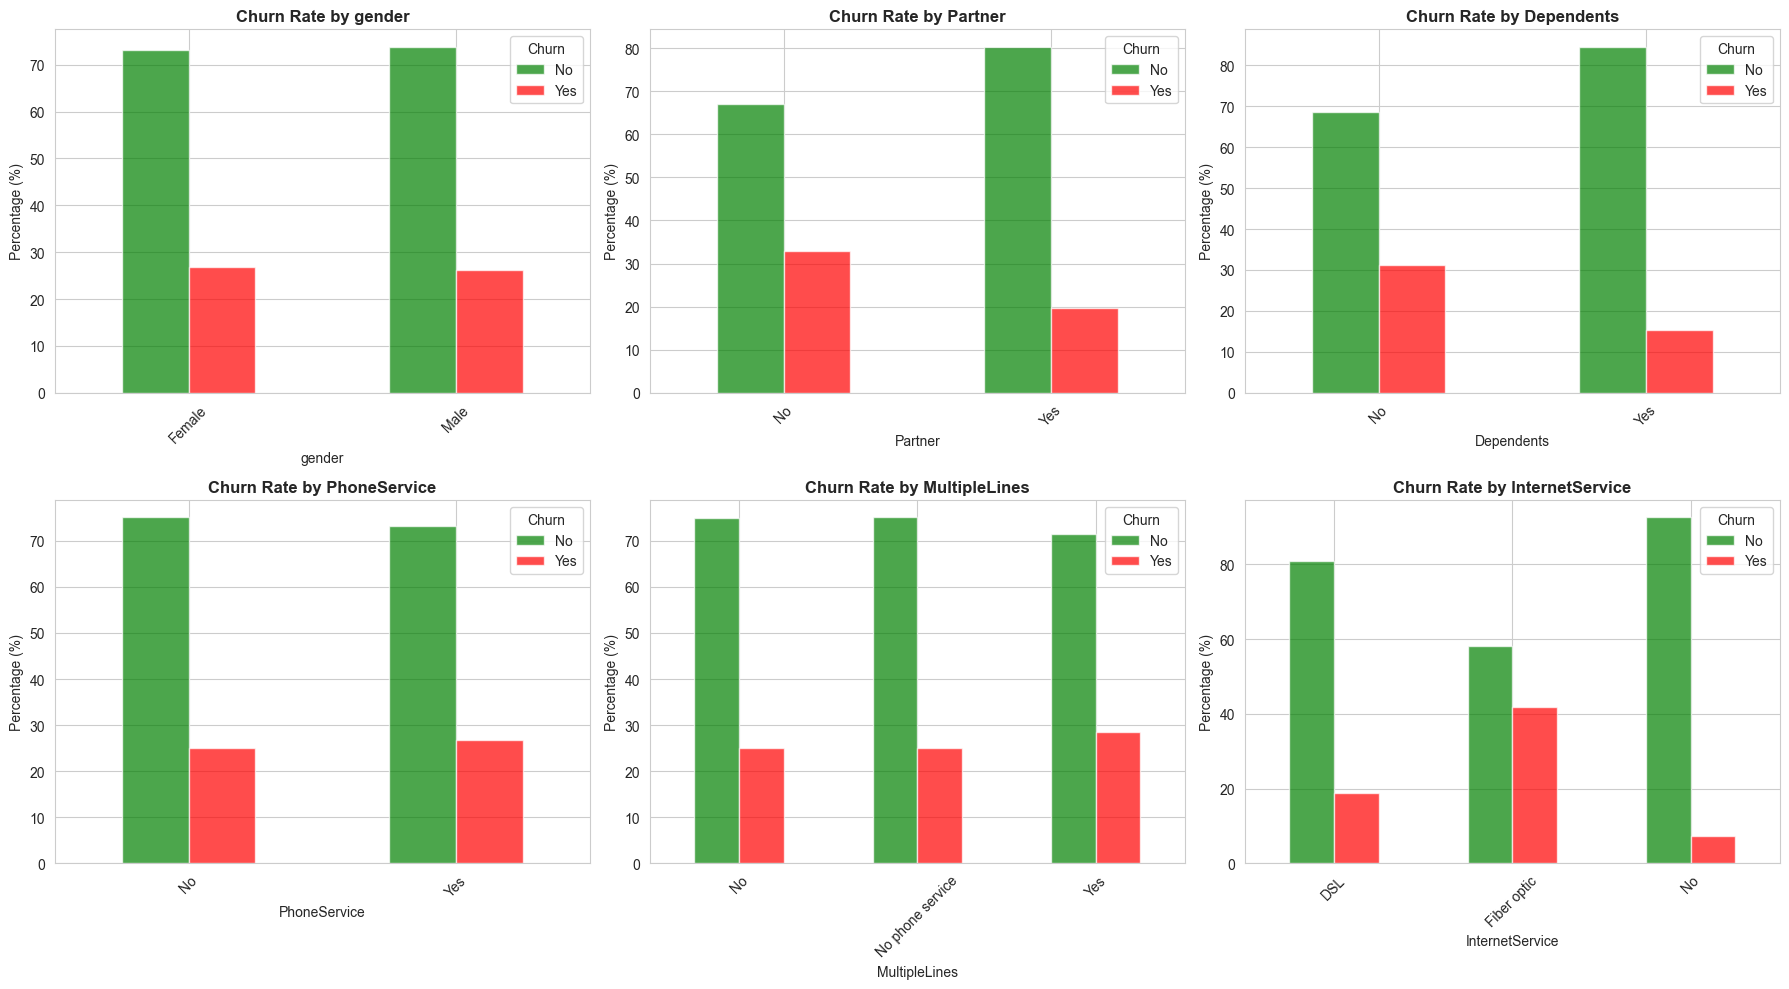

In [16]:
top_categorical = categorical_features[:6] if len(categorical_features) > 6 else categorical_features

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(top_categorical):
    churn_data = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_data.plot(kind='bar', ax=axes[idx], color=['green', 'red'], alpha=0.7)
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


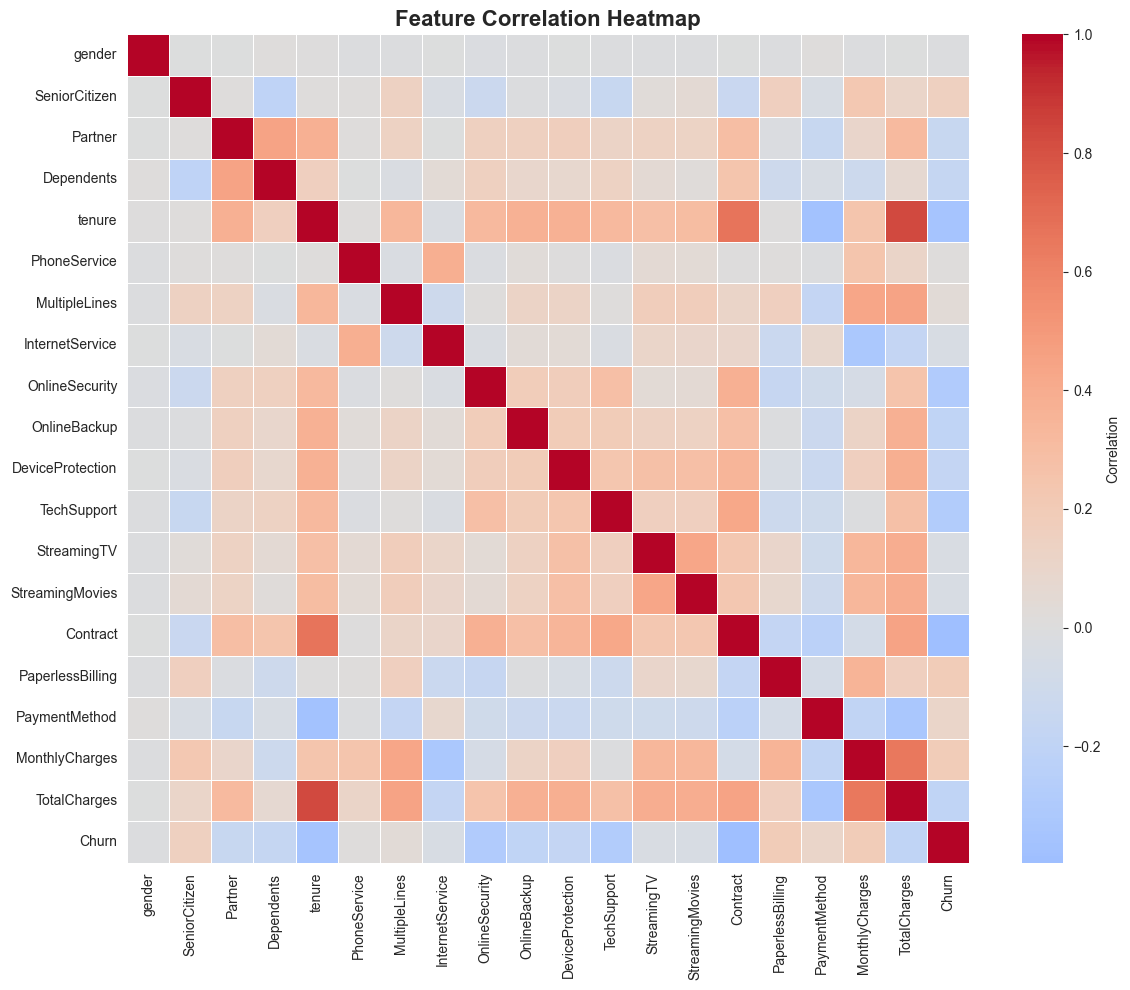

In [17]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded['Churn'] = (df_encoded['Churn'] == 'Yes').astype(int)

plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:

print("SAVING PROCESSED DATA")

output_file = 'processed_churn_data.csv'
df.to_csv(output_file, index=False)
print(f"✓ Processed data saved to: {output_file}")

SAVING PROCESSED DATA
✓ Processed data saved to: processed_churn_data.csv
